# STACK OVERFLOW

This project aims to explore the data and find relationships between variables belonging to a set of surveys conducted since 2011 by the Stack Overflow platform. As the publicly available data and survey results differed both in the character of the questions and the form of the files, there was a decision to use the largest possible part of datasets. In the end, surveys from the period 2017-2021 were used for the analysis.


# Data cleaning

The analysis began by loading the sets, removing unnecessary (according to the author) columns, and standardising variable names. For further analysis, a variable specifying the year in which the survey was conducted was also added.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 250
pd.options.display.max_rows = 500

In [ ]:
df_2017 = pd.read_csv('drive/MyDrive/Colab Notebooks/StackOverflow/2017_survey_results_public.csv')
#df_s_2017 = pd.read_csv('2017_survey_results_schema.csv')
print(df_2017.shape)

(51392, 154)


In [ ]:
df_2018 = pd.read_csv('drive/MyDrive/Colab Notebooks/StackOverflow/2018_survey_results_public.csv', low_memory=False)
#df_s_2018 = pd.read_csv('2018_survey_results_schema.csv')
print(df_2018.shape)

(98855, 129)


In [ ]:
df_2019 = pd.read_csv('drive/MyDrive/Colab Notebooks/StackOverflow/2019_survey_results_public.csv')
#df_s_2019 = pd.read_csv('2019_survey_results_schema.csv')
print(df_2019.shape)

(88883, 85)


In [ ]:
df_2020 = pd.read_csv('drive/MyDrive/Colab Notebooks/StackOverflow/2020_survey_results_public.csv')
#df_s_2020 = pd.read_csv('2020_survey_results_schema.csv')
print(df_2020.shape)

(64461, 61)


In [ ]:
df_2021 = pd.read_csv('drive/MyDrive/Colab Notebooks/StackOverflow/2021_survey_results_public.csv', engine='python')
#df_s_2021 = pd.read_csv('2021_survey_results_schema.csv')
print(df_2021.shape)

(83439, 48)


In [ ]:
df_2017['SurveyYear'] = 2017
df_2018['SurveyYear'] = 2018
df_2019['SurveyYear'] = 2019
df_2020['SurveyYear'] = 2020
df_2021['SurveyYear'] = 2021

In [ ]:
df_2017 = df_2017.loc[:, ~((df_2017.columns.str.contains('Assess')) |
                           (df_2017.columns.str.contains('Equipment')) |
                           (df_2017.columns.str.contains('ExCoder')) |
                           (df_2017.columns.str.contains('Important')) |
                           (df_2017.columns.str.contains('Influence')))
                     ]

In [ ]:
df_2017.shape

(51392, 101)

In [ ]:
df_2018 = df_2018.loc[:, ~((df_2018.columns.str.contains('Ad')) |
                           (df_2018.columns.str.contains('Agree')) |
                           (df_2018.columns.str.contains('Assess')) |
                           (df_2018.columns.str.contains('Hypothetical')) |
                           (df_2018.columns.str.contains('JobC')) |
                           (df_2018.columns.str.contains('JobE')))
                     ]

In [ ]:
df_2018.shape

(98855, 75)

In [ ]:
col_2017 = [column.replace('StackOverflow', 'SO') for column in list(df_2017.columns)]
col_2017 = [column.replace('Framework', 'Webframe') for column in col_2017]
col_2017 = [column.replace(column, column.split('WantWork')[1] + 'DesireNextYear') 
                if len(column.split('WantWork')) == 2 else column for column in col_2017]
col_2017 = [column.replace(column, column.split('HaveWorked')[1] + 'WorkedWith') 
                if len(column.split('HaveWorked')) == 2 else column for column in col_2017]

df_2017.columns = col_2017
df_2017.rename(columns={'ProgramHobby': 'Hobbyist'}, inplace=True)

In [ ]:
col_2018 = [column.replace('StackOverflow', 'SO') for column in list(df_2018.columns)]
col_2018 = [column.replace('Framework', 'Webframe') for column in col_2018]

df_2018.columns = col_2018
df_2018.rename(columns={'Hobby': 'Hobbyist'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
col_2019 = [column.replace('WebFrame', 'Webframe') for column in list(df_2019.columns)]
df_2019.columns = col_2019

In [ ]:
col_2020 = [column.replace('NEW', '') for column in list(df_2020.columns)]
df_2020.columns = col_2020

In [ ]:
col_2021 = [column.replace('NEW', '') for column in list(df_2021.columns)]
col_2021 = [column.replace('HaveWorkedWith', 'WorkedWith') for column in col_2021]
col_2021 = [column.replace('WantToWorkWith', 'DesireNextYear') for column in col_2021]

df_2021.columns = col_2021 	

The number and names of variables that appeared in the survey periods were then determined. Each year, interviewers were asked about gender, country of residence, and technology. The list of common variables for 2019-2021 is longer, with 34 columns, so these will be used in the further analysis on the construction of classification models.

In [ ]:
s17 = set(df_2017.columns)
s18 = set(df_2018.columns)
s19 = set(df_2019.columns)
s20 = set(df_2020.columns)
s21 = set(df_2021.columns)

In [ ]:
print(len(s21.intersection(s20)))
print(len(s21.intersection(s20, s19)))
s21.intersection(s20, s19, s18, s17)

39
34


{'Country',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'Gender',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'SurveyYear',
 'WebframeDesireNextYear',
 'WebframeWorkedWith'}

In [ ]:
s21.intersection(s20, s19)

{'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'Country',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MainBranch',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'Sexuality',
 'SurveyEase',
 'SurveyLength',
 'SurveyYear',
 'Trans',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'YearsCode',
 'YearsCodePro'}

# Joining datasets into one

The pre-cleaned sets were merged into one, and a few more columns were also removed, after which the created file was saved.

In [ ]:
dfs = [df_2017, df_2018, df_2019, df_2020, df_2021]
df = pd.concat(dfs)
df.shape

In [ ]:
drop_columns = np.array((df.columns.str.contains('Response') |
                         df.columns.str.contains('Respondent') |
                         df.columns.str.contains('Survey'))
               )
                  
drop_columns[list(df.columns).index('SurveyYear')] = False
df = df.loc[:, ~drop_columns].reset_index(drop=True)

In [ ]:
#df.to_csv('drive/MyDrive/Colab Notebooks/StackOverflow/survey_results_2017_2021.csv', index=False)

# Technologies through years

Data exploration began by using common variables over the years, i.e., technologies used and desired by respondents. The dataset was restricted to a set of variables describing technologies with which they worked and a set of variables describing technologies they would desire to work with. The data were then cleaned of troublesome characters, i.e. (a plus, a dot, etc.), divided (a semicolon), and counted for time (past, future), technology, and year. The resulting DataFrame (augmented with a column that was the sum of the years 2017-2021) was cleaned of duplicates, and the ultimate results were presented in graphs. 



In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/StackOverflow/survey_results_2017_2021.csv')
print(df.shape)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,99,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,166,169,170,171,172,173,174,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(387030, 231)


,Professional,Hobbyist,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,Currency,Overpaid,TabsSpaces,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,LanguageWorkedWith,LanguageDesireNextYear,WebframeWorkedWith,WebframeDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,SODescribes,SOSatisfaction,SODevices,SOFoundAnswer,SOCopiedCode,SOJobListing,SOCompanyPage,SOJobSearch,SONewQuestion,SOAnswer,SOMetaChat,SOAdsRelevant,SOAdsDistracting,SOModeration,SOCommunity,SOHelpful,SOBetter,SOWhatDo,SOMakeMoney,Gender,HighestEducationParents,Race,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,SurveyYear,OpenSource,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,UpdateCV,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,HackathonReasons,OperatingSystem,NumberMonitors,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,SORecommend,SOVisit,SOHasAccount,SOParticipate,SOJobs,SODevStory,SOJobsRecommend,SOConsiderMember,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,MainBranch,OpenSourcer,EdLevel,EduOther,OrgSize,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,EntTeams,SOComm,WelcomeChange,SONewContent,Trans,Sexuality,Ethnicity,CollabToolsDesireNextYear,CollabToolsWorkedWith,DevOps,DevOpsImpt,EdImpt,JobHunt,JobHuntResearch,Learn,OffTopic,OnboardGood,OtherComms,Overtime,PurchaseResearch,PurpleLink,SOSites,Stuck,US_State,UK_Country,LearnCode,ToolsTechWorkedWith,ToolsTechDesireNextYear,Accessibility,MentalHealth,ConvertedCompYearly
0,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Yes,Other,NaN,NaN,NaN,NaN,Tabs,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or o

In [ ]:
df_past_tech = df.loc[:, df.columns.str.contains('WorkedWith')]
df_future_tech = df.loc[:, df.columns.str.contains('DesireNextYear')]

In [ ]:
df_past_tech.fillna('', inplace = True)
df_future_tech.fillna('', inplace = True)

In [ ]:
df_past_tech['SurveyYear'] = df['SurveyYear']
df_past_tech.head()

In [ ]:
df_future_tech['SurveyYear'] = df['SurveyYear']
df_future_tech.head()

In [ ]:
df_past_tech = df_past_tech.replace(to_replace ='[+]', value = 'P', regex = True). \
                            replace(to_replace ='[.]', value = '_', regex = True). \
                            replace(to_replace ='[(]', value = '', regex = True). \
                            replace(to_replace ='[)]', value = '', regex = True)

df_future_tech = df_future_tech.replace(to_replace ='[+]', value = 'P', regex = True). \
                                replace(to_replace ='[.]', value = '_', regex = True). \
                                replace(to_replace ='[(]', value = '', regex = True). \
                                replace(to_replace ='[)]', value = '', regex = True)

In [ ]:
#df_past_tech.to_csv('drive/MyDrive/Colab Notebooks/StackOverflow/past_tech.csv', index=False)
#df_future_tech.to_csv('drive/MyDrive/Colab Notebooks/StackOverflow/future_tech.csv', index=False)

In [ ]:
import re
import itertools

dict_past_tech = {}
dict_future_tech = {}

for i in list(df_past_tech.columns[:-1]):
  dict_past_tech[i] = list({*list(itertools.chain(*list(df_past_tech[i].str.split(r'; *'))))} - {'', 'Others:'})

for i in list(df_future_tech.columns[:-1]):
  dict_future_tech[i] = list({*list(itertools.chain(*list(df_future_tech[i].str.split(r'; *'))))} - {'', 'Others:'})


In [ ]:
df_past = pd.DataFrame([dict_past_tech])
df_future = pd.DataFrame([dict_future_tech])

tech_past_indexes = pd.concat([pd.get_dummies(df_past[i].explode()).min(level=0).add_prefix('Past_' + i.split('Worked')[0] + ' ')
                      for i in list(dict_past_tech.keys())], ignore_index=True).T

tech_future_indexes = pd.concat([pd.get_dummies(df_future[i].explode()).min(level=0).add_prefix('Future_' + i.split('Desire')[0] + ' ')
                      for i in list(dict_future_tech.keys())], ignore_index=True).T

df_tech = pd.concat([tech_past_indexes, tech_future_indexes])
df_tech.fillna(0, inplace=True)
df_tech.columns = list(range(2017, 2024))
df_tech = df_tech.loc[:, 2017:2021]

In [ ]:
for year in range(2017, 2022):
  for category in list(dict_past_tech.keys()):
    for language in dict_past_tech[category]:
      df_tech.loc[('Past_' + category.split('Worked')[0] + ' ' + language), year] = \
            df_past_tech.loc[((df_past_tech['SurveyYear'] == year) & 
            (df_past_tech[category].str.contains(f';? ?{language} ?;?', regex=True, na=False)))].shape[0]

In [ ]:
for year in range(2017, 2022):
  for category in list(dict_future_tech.keys()):
    for language in dict_future_tech[category]:
      df_tech.loc[('Future_' + category.split('Desire')[0] + ' ' + language), year] = \
            df_future_tech.loc[((df_future_tech['SurveyYear'] == year) & 
            (df_future_tech[category].str.contains(f';? ?{language} ?;?', regex=True, na=False)))].shape[0]

In [ ]:
df_tech = df_tech.astype(int)
df_tech['ALL'] = df_tech[2017] + df_tech[2018] + df_tech[2019] + df_tech[2020] + df_tech[2021]

#df_tech.to_csv('drive/MyDrive/Colab Notebooks/StackOverflow/technologies_all.csv', index=True)

In [4]:
df_tech = pd.read_csv('drive/MyDrive/Colab Notebooks/StackOverflow/technologies_all.csv')
df_tech = df_tech.rename(columns = {'Unnamed: 0' : 'Technology'})
df_tech.set_index('Technology', inplace=True)

In [5]:
df_tech.loc['Past_Language HTML/CSS', '2018'] = \
        (df_tech.loc['Past_Language CSS', '2018'] + df_tech.loc['Past_Language HTML', '2018'])/2

df_tech.loc['Future_Language HTML/CSS', '2018'] = \
        (df_tech.loc['Future_Language CSS', '2018'] + df_tech.loc['Future_Language HTML', '2018'])/2

df_tech.loc['Past_Webframe Angular_js', '2017'] = df_tech.loc['Past_Webframe AngularJS', '2017']
df_tech.loc['Future_Webframe Angular_js', '2017'] = df_tech.loc['Future_Webframe AngularJS', '2017']

df_tech.loc['Past_Database IBM DB2', '2018'] = df_tech.loc['Past_Database IBM Db2', '2018']
df_tech.loc['Future_Database IBM DB2', '2018'] = df_tech.loc['Future_Database IBM Db2', '2018']

df_tech.loc['Past_Platform MacOS', ['2017','2018']] = df_tech.loc['Past_Platform Mac OS', ['2017','2018']]
df_tech.loc['Future_Platform MacOS', ['2017','2018']] = df_tech.loc['Future_Platform Mac OS', ['2017','2018']]


df_tech.drop(['Past_Language CSS', 'Past_Language HTML', 'Future_Language CSS', 'Future_Language HTML',
 'Past_Language Bash/Shell/PowerShell', 'Future_Language Bash/Shell/PowerShell',
 'Past_Language Delphi/Object Pascal', 'Future_Language Delphi/Object Pascal',
 'Past_Webframe ASP_NET Core ', 'Future_Webframe ASP_NET Core ',
 'Past_Webframe Angular/Angular_js', 'Past_Webframe AngularJS',
 'Future_Webframe Angular/Angular_js', 'Future_Webframe AngularJS',
 'Past_Webframe React_js', 'Future_Webframe React_js',
 'Past_Database IBM Db2', 'Future_Database IBM Db2',
 'Past_Platform Google Cloud Platform/App Engine', 'Future_Platform Google Cloud Platform/App Engine',
 'Past_Platform Linux Desktop', 'Future_Platform Linux Desktop',
 'Past_Platform Mac OS', 'Future_Platform Mac OS',
 'Past_Platform Slack Apps and Integrations', 'Future_Platform Slack Apps and Integrations',
 'Past_Platform Windows Desktop or Server', 'Future_Platform Windows Desktop or Server',
 'Past_MiscTech _NET Core / _NET 5', 'Future_MiscTech _NET Core / _NET 5'
 
 ], axis=0, inplace=True)


df_tech['ALL'] = df_tech['2017'] + df_tech['2018'] + df_tech['2019'] + df_tech['2020'] + df_tech['2021']
df_tech = df_tech.astype(int)

In [6]:
df_tech_plots = df_tech.T.reset_index(level=0)
df_tech_plots = df_tech_plots.melt('index', var_name='Tech', value_name='Values')

For each category and by time (past, future), graphs have been drawn for the top 8 (in terms of number of occurrences) technologies by year (2017-2021) and the top 10 most numerous technologies were shown in bar charts. 

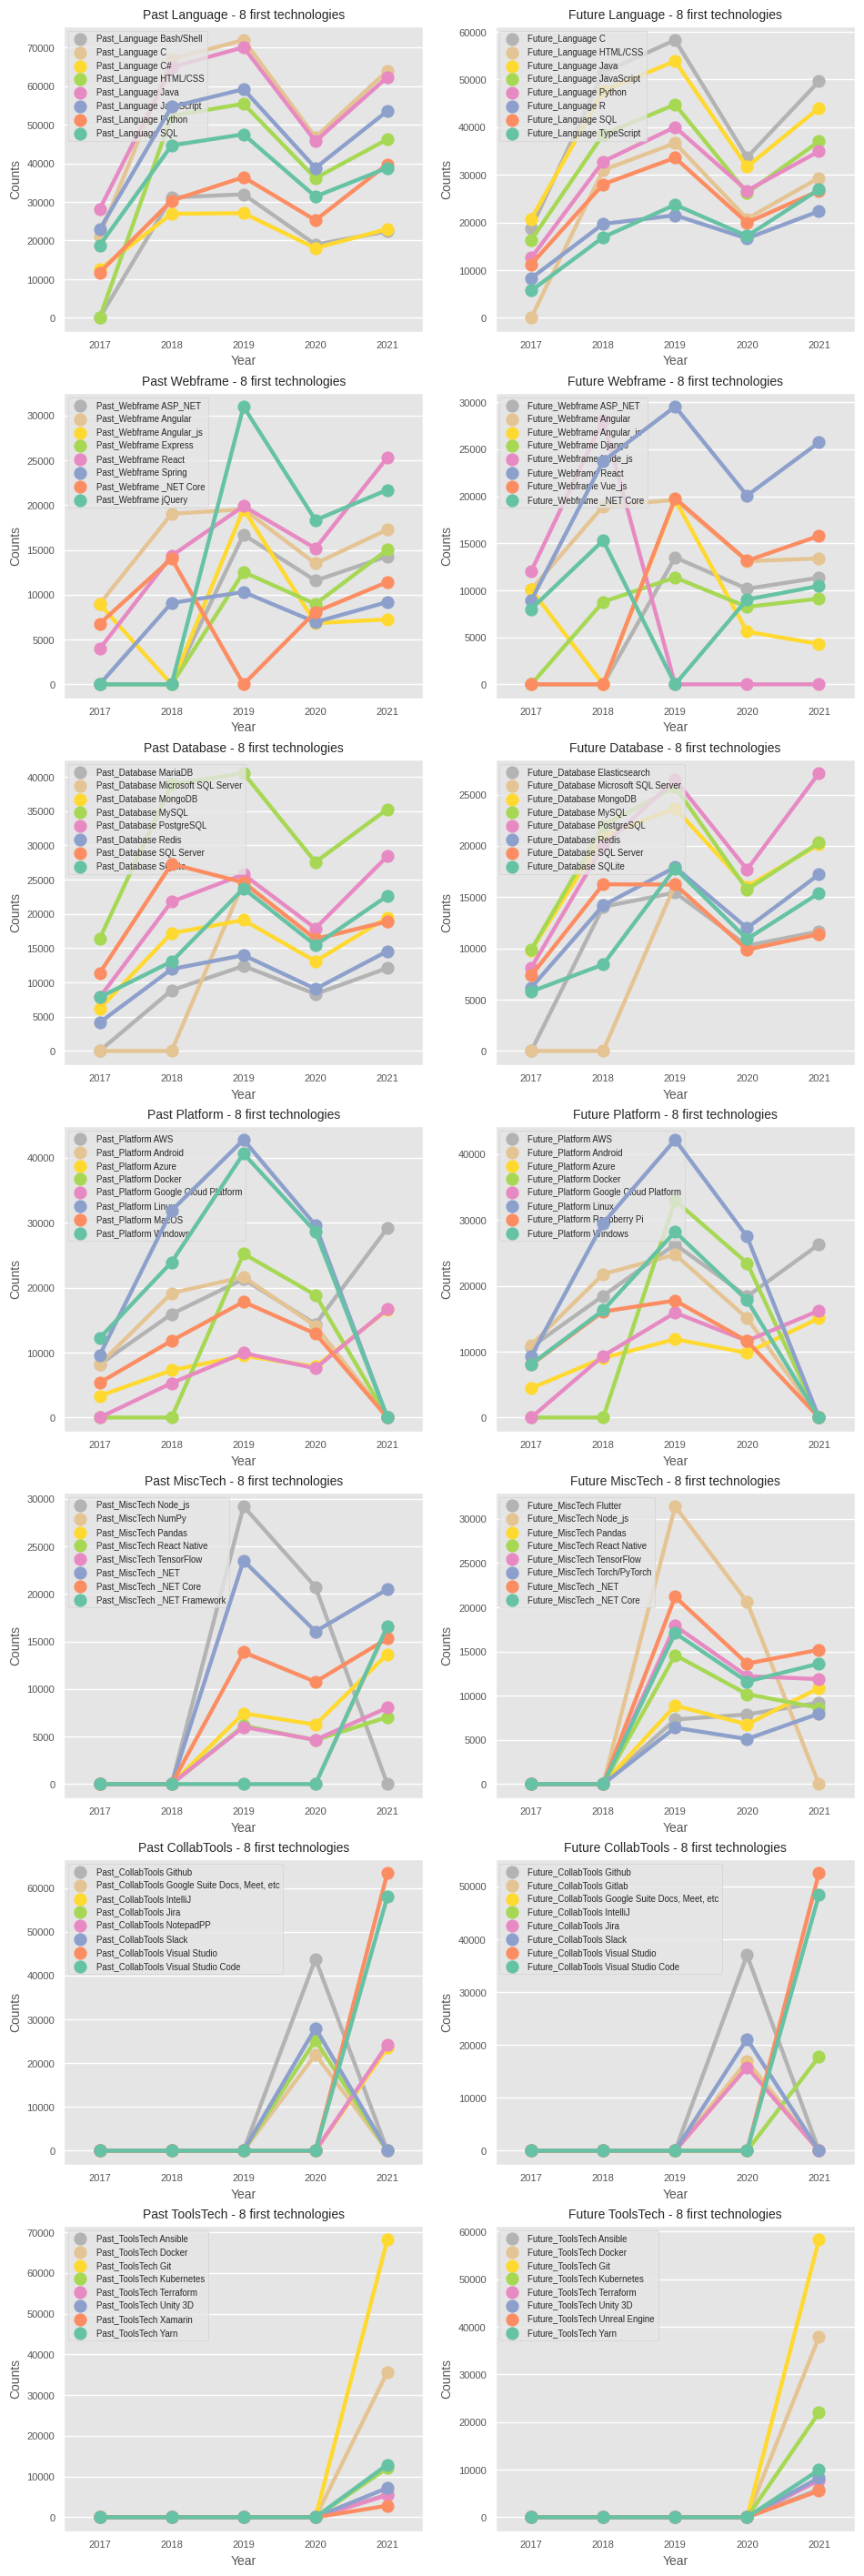

In [123]:
categories = ['Language', 'Webframe', 'Database', 'Platform', 'MiscTech', 'CollabTools', 'ToolsTech']
time = ['Past', 'Future']

fig = plt.figure(figsize=(10,34))
plt.style.use('ggplot')

plot_number = 1
for i in categories:
  for j in time:

      plt.subplot(7,2, plot_number)
      var_name = j + '_' + i
      tech_idx = list(df_tech.loc[df_tech.index.str.contains(var_name), 'ALL'].nlargest(8).index)
      sns.pointplot(x="index", y="Values", hue='Tech', palette="Set2_r",
            data=df_tech_plots.loc[(df_tech_plots['Tech'].isin(tech_idx)) & ~(df_tech_plots['index']=='ALL')], kind='point')
      title = j + ' ' + i + ' - 8 first technologies'
      plt.title(title, size = 10)
      plt.legend(loc = 2, fontsize = 'x-small', frameon = 'True', framealpha = 0.80)
      plt.xlabel('Year', size=10)
      plt.ylabel('Counts', size=10)
      plt.xticks(size=8)
      plt.yticks(size=8)
      
      plot_number +=1

plt.show()

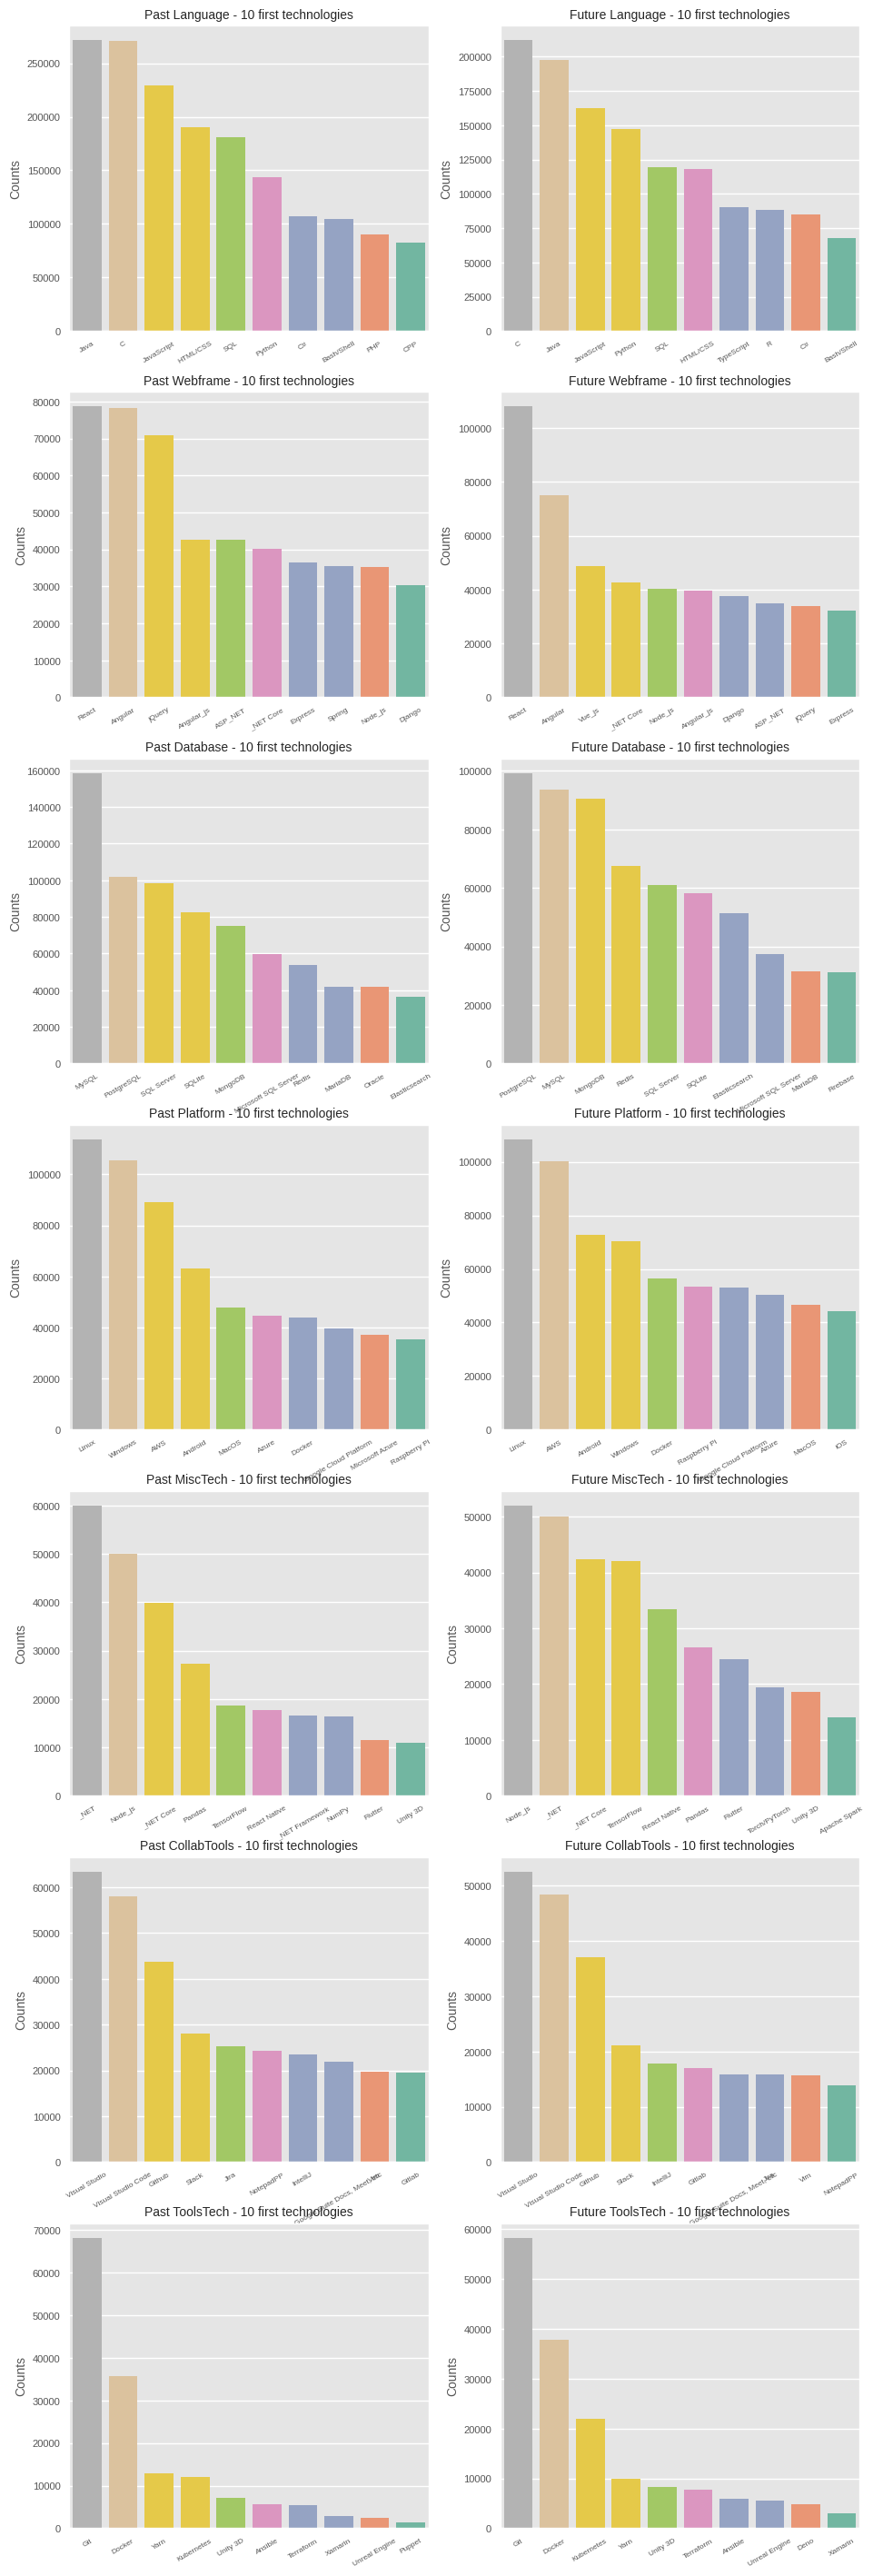

In [198]:
categories = ['Language', 'Webframe', 'Database', 'Platform', 'MiscTech', 'CollabTools', 'ToolsTech']
time = ['Past', 'Future']

fig = plt.figure(figsize=(10,34))
plt.style.use('ggplot')

plot_number = 1
for i in categories:
  for j in time:

      plt.subplot(7,2, plot_number)
      var_name = j + '_' + i
      tech_idx = list(df_tech.loc[df_tech.index.str.contains(var_name), 'ALL'].nlargest(10).index)
      data = df_tech_plots.loc[(df_tech_plots['Tech'].isin(tech_idx)) & (df_tech_plots['index']=='ALL')]
      order = data.groupby('Tech').mean().sort_values('Values', ascending=False).index
      sns.barplot(x="Tech", y="Values", palette="Set2_r", data=data, order=order)
      title = j + ' ' + i + ' - 10 first technologies'
      plt.title(title, size=10)
      plt.xlabel(None)
      plt.ylabel('Counts', size=10)
      plt.xticks(np.arange(10),list(pd.Series(order).apply(lambda x: ' '.join(x.split(' ')[1:]))), size=6, rotation=30)
      plt.yticks(size=8)

      plot_number +=1

plt.show()

# Co-occurrence matrix

The next step of the analysis was to show the co-occurrences of technologies. This time, the main DataFrame was used. The data were split (a semicolon) and then a co-occurrence matrix was determined for each pair by time (past, future) and technology.



In [ ]:
df_past_tech = pd.read_csv('drive/MyDrive/Colab Notebooks/StackOverflow/past_tech.csv', na_values='NA')
df_past_tech.fillna('', inplace=True)

df_future_tech = pd.read_csv('drive/MyDrive/Colab Notebooks/StackOverflow/future_tech.csv', na_values='NA')
df_future_tech.fillna('', inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
import itertools 

def co_occurrence_matrix(df_tech: pd.DataFrame = None) -> pd.DataFrame:
  ''' Create co-occurrence matrix for given technology category '''

  df_tech_splitted = list(df_tech.str.split(r'; *'))
  combinations = [list(itertools.combinations(i,2)) for i in df_tech_splitted]
  combinations = list(itertools.chain.from_iterable((item, item[::-1]) for pair in combinations for item in pair))

  df_co_occ = pd.DataFrame(combinations)
  df_co_occ = pd.pivot_table(df_co_occ, index=0, columns=1, aggfunc='size', fill_value=0) \
            .rename_axis(None,axis=0).rename_axis(None,axis=1).astype(int)
  if df_co_occ.columns.str.contains('Others:').sum():
    df_co_occ.drop(['Others:'], axis=1, inplace=True)
    df_co_occ.drop(['Others:'], axis=0, inplace=True)

  return df_co_occ

In [ ]:
df_occ_p_lang = df_occ_p_webf = df_occ_p_datab = df_occ_p_platf = df_occ_p_misctech = df_occ_p_collab = df_occ_p_tools = pd.DataFrame()
list_past_dfs = [df_occ_p_lang, df_occ_p_webf, df_occ_p_datab, df_occ_p_platf, df_occ_p_misctech, df_occ_p_collab, df_occ_p_tools]

for index, key in enumerate(df_past_tech.columns[:-1]):  
  list_past_dfs[index] = co_occurrence_matrix(df_past_tech[key])
  print(key, list_past_dfs[index].shape)


LanguageWorkedWith (52, 52)
WebframeWorkedWith (31, 31)
DatabaseWorkedWith (26, 26)
PlatformWorkedWith (39, 39)
MiscTechWorkedWith (24, 24)
CollabToolsWorkedWith (32, 32)
ToolsTechWorkedWith (14, 14)


In [ ]:
df_occ_f_lang = df_occ_f_webf = df_occ_f_datab = df_occ_f_platf = df_occ_f_misctech = df_occ_f_collab = df_occ_f_tools = pd.DataFrame()
list_future_dfs = [df_occ_f_lang, df_occ_f_webf, df_occ_f_datab, df_occ_f_platf, df_occ_f_misctech, df_occ_f_collab, df_occ_f_tools]

for index, key in enumerate(df_future_tech.columns[:-1]): 
  list_future_dfs[index] = co_occurrence_matrix(df_future_tech[key])
  print(key, list_future_dfs[index].shape)
  

LanguageDesireNextYear (52, 52)
WebframeDesireNextYear (31, 31)
DatabaseDesireNextYear (26, 26)
PlatformDesireNextYear (39, 39)
MiscTechDesireNextYear (24, 24)
CollabToolsDesireNextYear (32, 32)
ToolsTechDesireNextYear (14, 14)


Again, repeating names were cleaned up. As a result, 14 DataFrames (7 past, 7 future) were created. 

In [ ]:
list_past_dfs[1].loc['Angular_js'] += list_past_dfs[1].loc['AngularJS']
list_past_dfs[1].loc[:,'Angular_js'] += list_past_dfs[1].loc[:,'AngularJS']
list_future_dfs[1].loc['Angular_js'] += list_future_dfs[1].loc['AngularJS']
list_future_dfs[1].loc[:,'Angular_js'] += list_future_dfs[1].loc[:,'AngularJS']

list_past_dfs[2].loc['IBM DB2'] += list_past_dfs[2].loc['IBM Db2']
list_past_dfs[2].loc[:,'IBM DB2'] += list_past_dfs[2].loc[:,'IBM Db2']
list_future_dfs[2].loc['IBM DB2'] += list_future_dfs[2].loc['IBM Db2']
list_future_dfs[2].loc[:,'IBM DB2'] += list_future_dfs[2].loc[:,'IBM Db2']

list_past_dfs[3].loc['MacOS'] += list_past_dfs[3].loc['Mac OS']
list_past_dfs[3].loc[:,'MacOS'] += list_past_dfs[3].loc[:,'Mac OS']
list_future_dfs[3].loc['MacOS'] += list_future_dfs[3].loc['Mac OS']
list_future_dfs[3].loc[:,'MacOS'] += list_future_dfs[3].loc[:,'Mac OS']

list_past_dfs[0].drop(index='Bash/Shell/PowerShell', columns='Bash/Shell/PowerShell', inplace=True)
list_past_dfs[0].drop(index='Delphi/Object Pascal', columns='Delphi/Object Pascal', inplace=True)
list_future_dfs[0].drop(index='Delphi/Object Pascal', columns='Delphi/Object Pascal', inplace=True)
list_future_dfs[0].drop(index='Bash/Shell/PowerShell', columns='Bash/Shell/PowerShell', inplace=True)

list_past_dfs[1].drop(index='ASP_NET Core', columns='ASP_NET Core', inplace=True)
list_past_dfs[1].drop(index='AngularJS', columns='AngularJS', inplace=True)
list_past_dfs[1].drop(index='Angular/Angular_js', columns='Angular/Angular_js', inplace=True)
list_past_dfs[1].drop(index='React_js', columns='React_js', inplace=True)
list_future_dfs[1].drop(index='ASP_NET Core', columns='ASP_NET Core', inplace=True)
list_future_dfs[1].drop(index='AngularJS', columns='AngularJS', inplace=True)
list_future_dfs[1].drop(index='Angular/Angular_js', columns='Angular/Angular_js', inplace=True)
list_future_dfs[1].drop(index='React_js', columns='React_js', inplace=True)

list_past_dfs[2].drop(index='IBM Db2', columns='IBM Db2', inplace=True)
list_future_dfs[2].drop(index='IBM Db2', columns='IBM Db2', inplace=True)

list_past_dfs[3].drop(index='Google Cloud Platform/App Engine', columns='Google Cloud Platform/App Engine', inplace=True)
list_past_dfs[3].drop(index='Linux Desktop', columns='Linux Desktop', inplace=True)
list_past_dfs[3].drop(index='Mac OS', columns='Mac OS', inplace=True)
list_past_dfs[3].drop(index='Slack Apps and Integrations', columns='Slack Apps and Integrations', inplace=True)
list_past_dfs[3].drop(index='Windows Desktop or Server', columns='Windows Desktop or Server', inplace=True)

list_future_dfs[3].drop(index='Google Cloud Platform/App Engine', columns='Google Cloud Platform/App Engine', inplace=True)
list_future_dfs[3].drop(index='Linux Desktop', columns='Linux Desktop', inplace=True)
list_future_dfs[3].drop(index='Mac OS', columns='Mac OS', inplace=True)
list_future_dfs[3].drop(index='Slack Apps and Integrations', columns='Slack Apps and Integrations', inplace=True)
list_future_dfs[3].drop(index='Windows Desktop or Server', columns='Windows Desktop or Server', inplace=True)

list_past_dfs[4].drop(index='_NET Core / _NET 5', columns='_NET Core / _NET 5', inplace=True)
list_future_dfs[4].drop(index='_NET Core / _NET 5', columns='_NET Core / _NET 5', inplace=True)


# Co-occurence matrix - heatmap

As the names of the technologies are consistent with past and future time, it was merged the results into heat maps, where the lower triangular matrix represents the technologies the respondents have worked with (past), while the upper triangular matrix represents the technologies they would like to work with (future). The diagonal of the matrix (filled with 0) has been masked (to show and emphasise the border between the upper and lower matrixes), and the largest values relative to the rows and columns have been framed and annotated. In all 7 matrices, we can observe partial symmetry in the number of co-occurrences of given pairs of variables.


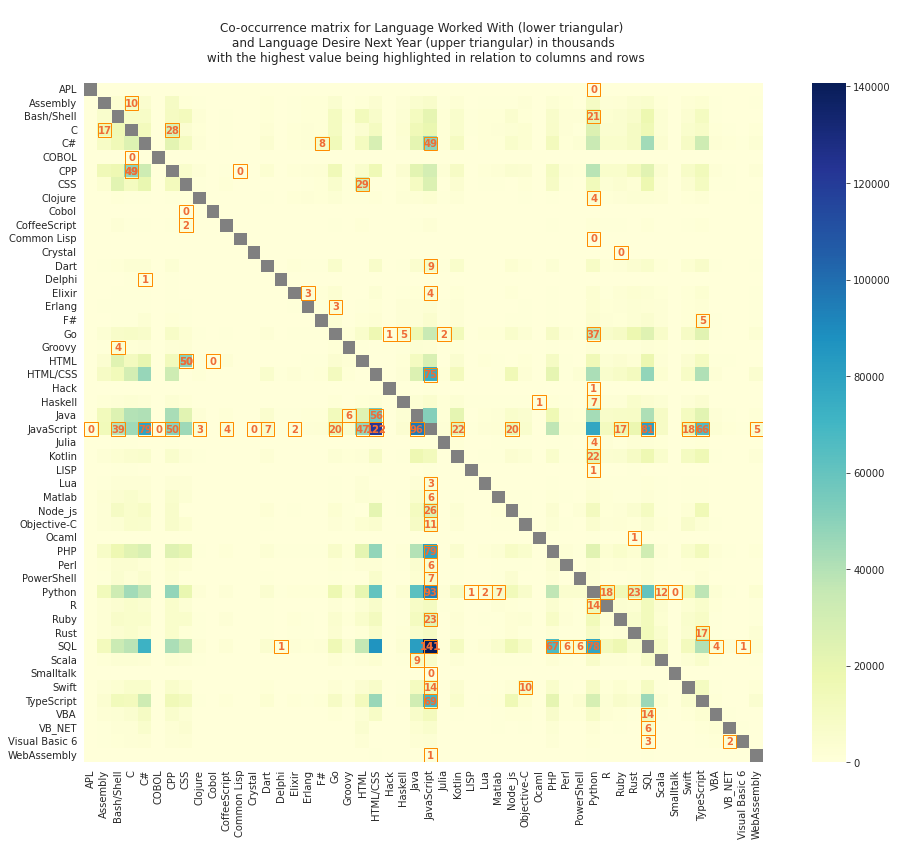

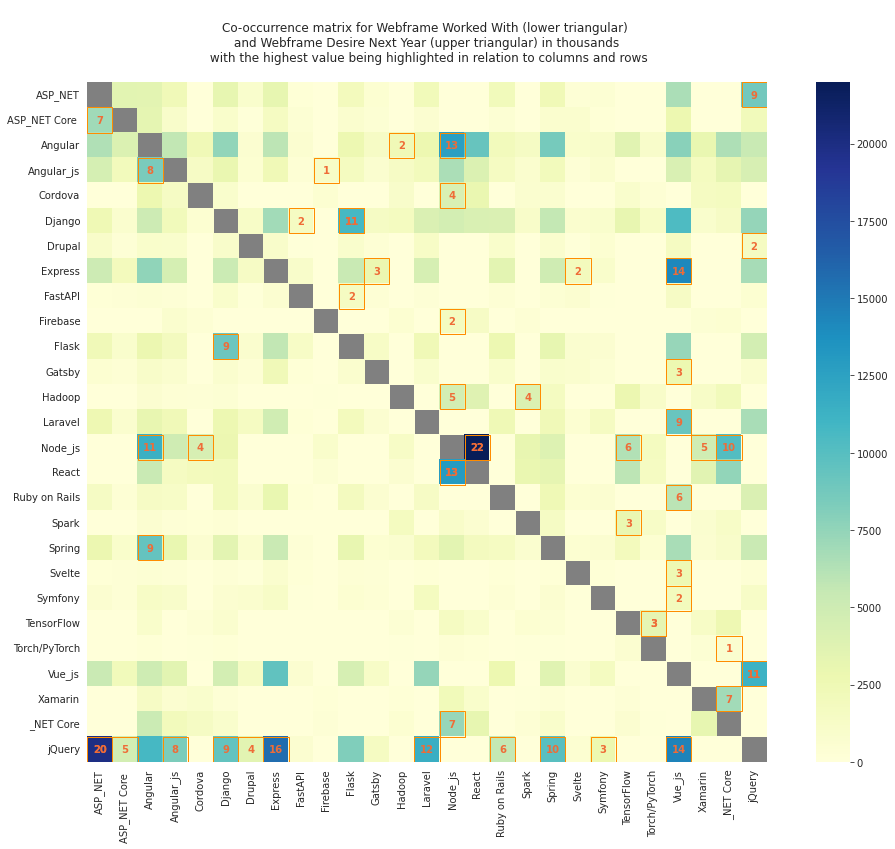

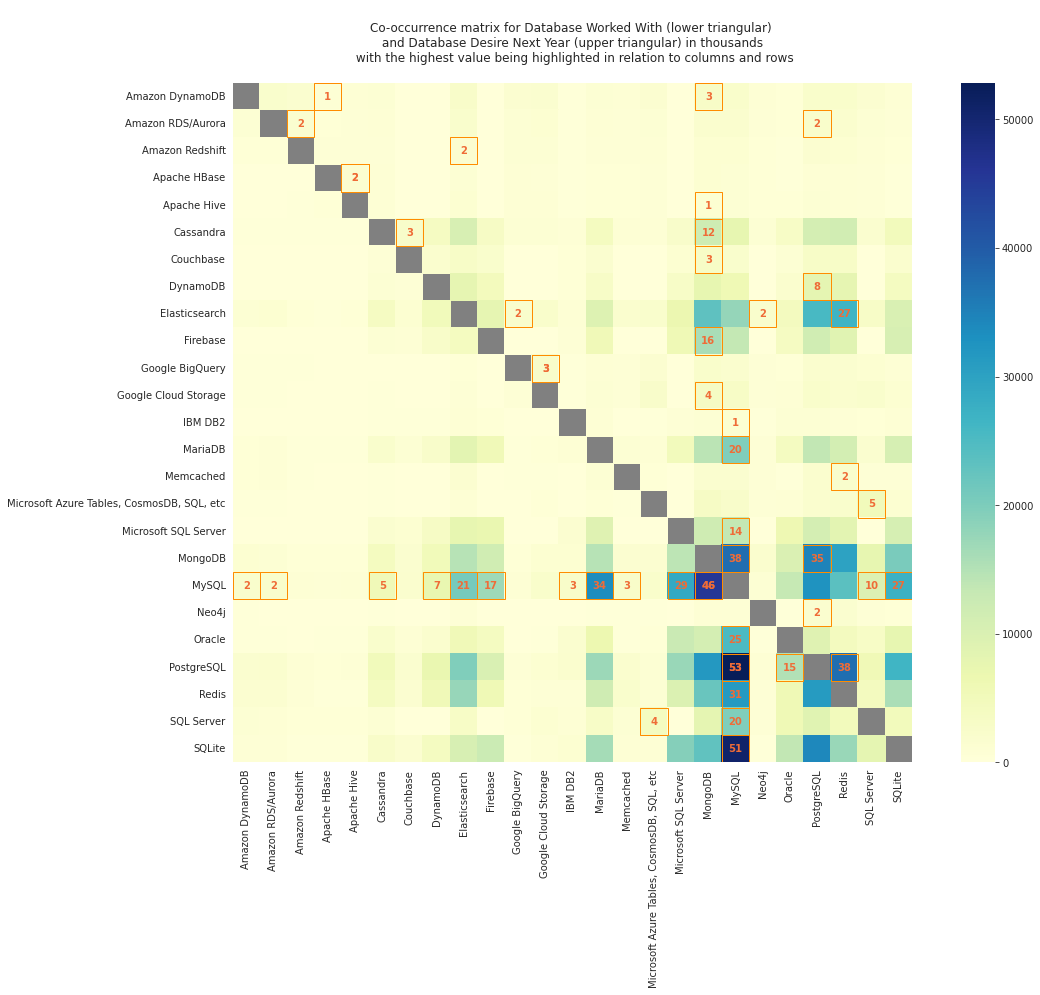

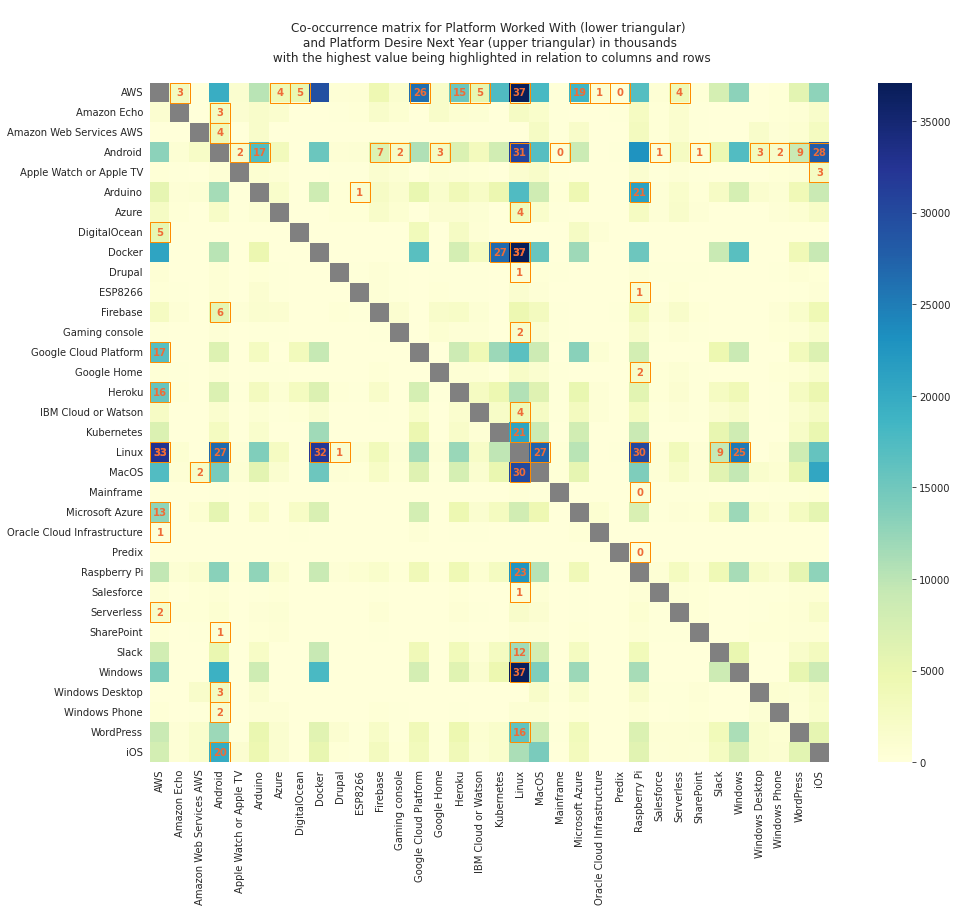

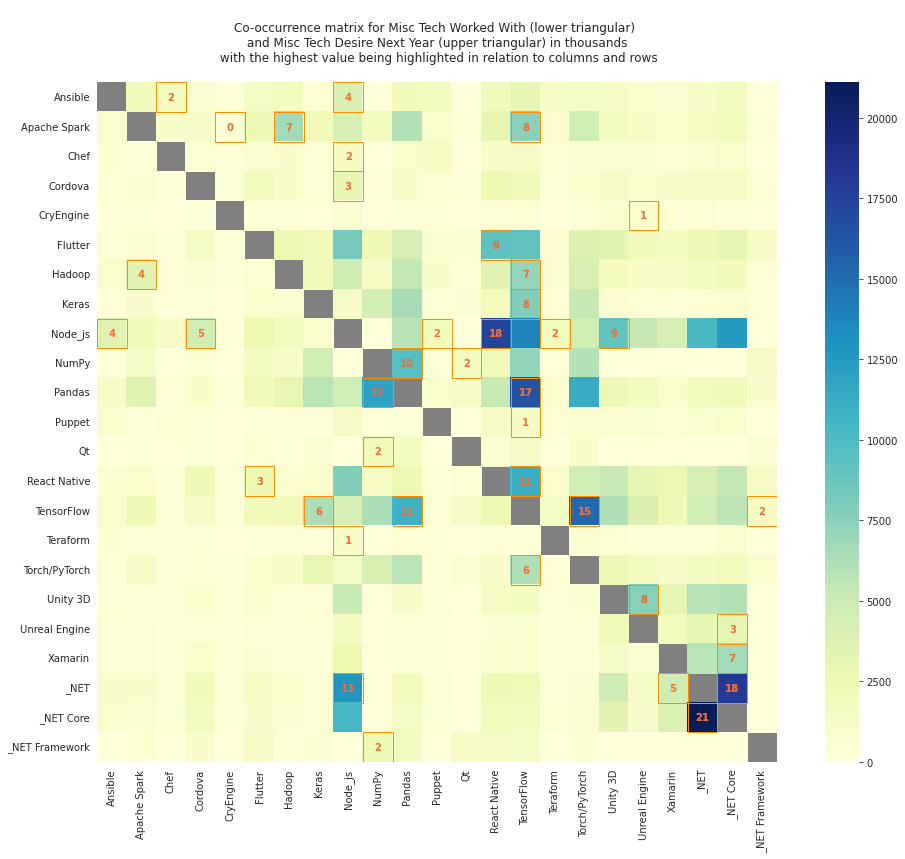

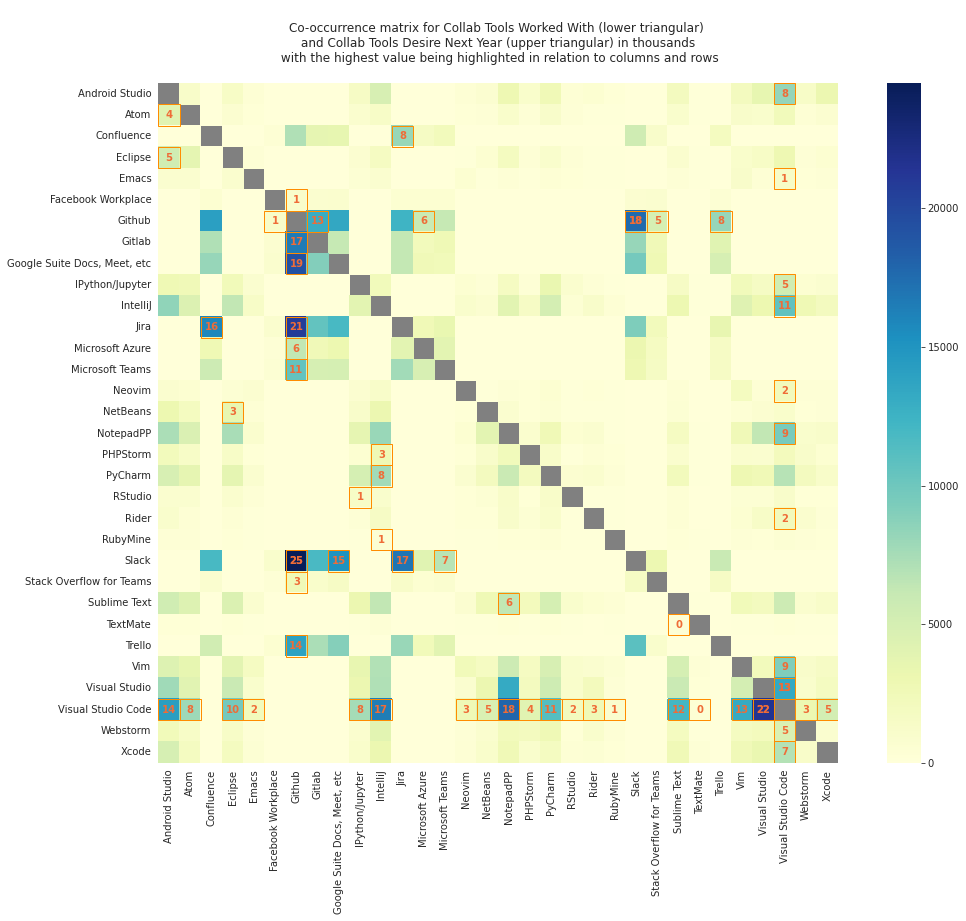

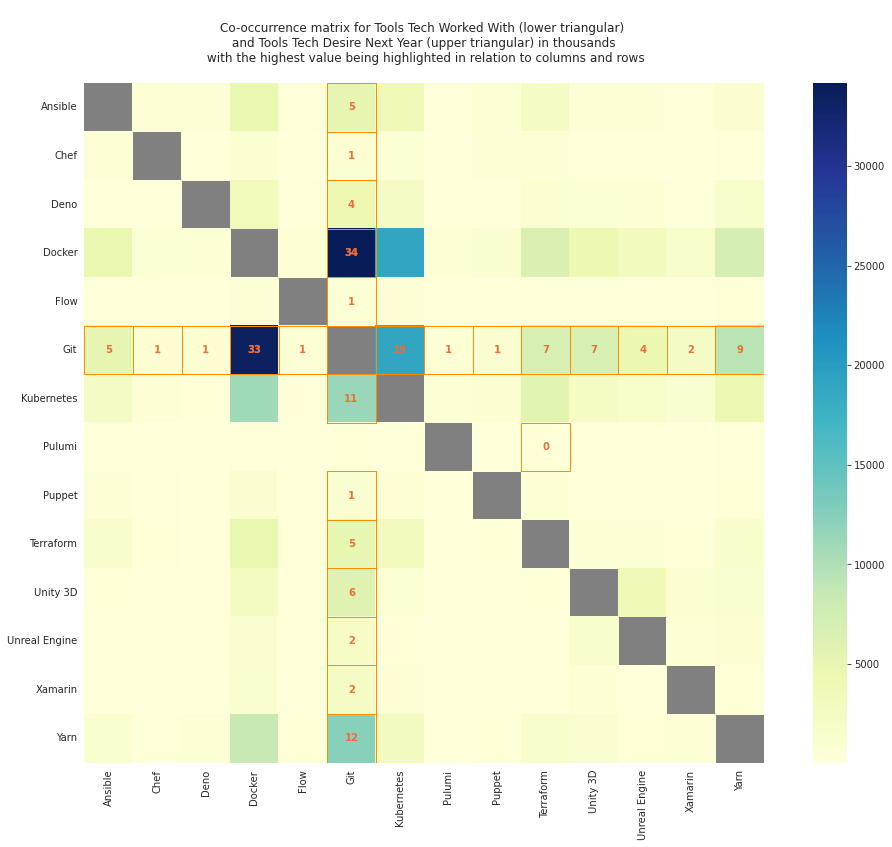

In [ ]:
from matplotlib import patches
from matplotlib.patches import Rectangle
import re

for i in range(len(list_past_dfs)):
  df_l = list_past_dfs[i].to_numpy().copy()
  df_u = list_future_dfs[i].to_numpy().copy()

  df_l[np.triu_indices(df_l.shape[0])] = 0
  df_u[np.tril_indices(df_u.shape[0])] = 0

  lu = df_l + df_u
  lu_matrix = pd.DataFrame(data=lu, columns=list_past_dfs[i].columns, index=list_past_dfs[i].index)
  mask1 = np.eye(lu.shape[0])

  M_cols = lu_matrix.idxmax(axis=0)
  M_rows = lu_matrix.idxmax(axis=1)

  with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17.5, 12.5))
    sns.heatmap(lu_matrix, mask=mask1, square=True, cmap="YlGnBu", ax=ax)
    ax.patch.set_facecolor('grey')
    past = ' '.join(re.findall('[A-Z][^A-Z]*', df_past_tech.columns[i]))
    future = ' '.join(re.findall('[A-Z][^A-Z]*', df_future_tech.columns[i]))
    title = f'\nCo-occurrence matrix for {past} (lower triangular) \n and {future} (upper triangular) in thousands \n with the highest value being highlighted in relation to columns and rows\n'
    ax.set_title(title)

    for col, variable in enumerate(lu_matrix.columns):

        position = lu_matrix.index.get_loc(M_cols[variable])
        rectangle = patches.Rectangle((col, position), 1, 1, edgecolor='darkorange', fill=None, linewidth=1)
        ax.add_patch(rectangle)
        rx, ry = rectangle.get_xy()
        cx = rx + rectangle.get_width()/2.0
        cy = ry + rectangle.get_height()/2.0

        ax.annotate(str(round(lu_matrix.iloc[position, col]/1000,0).astype(int)),
                    (cx, cy), color='#EF6C37', weight='bold', fontsize=10, ha='center', va='center')


    for row, index in enumerate(lu_matrix.index):

        position = lu_matrix.columns.get_loc(M_rows[index])
        rectangle = patches.Rectangle((position, row), 1, 1, edgecolor='darkorange', fill=None, linewidth=1)
        ax.add_patch(rectangle)
        rx, ry = rectangle.get_xy()
        cx = rx + rectangle.get_width()/2.0
        cy = ry + rectangle.get_height()/2.0

        ax.annotate(str(round(lu_matrix.iloc[row, position]/1000,0).astype(int)),
                    (cx, cy), color='#EF6C37', weight='bold', fontsize=10, ha='center', va='center')
    

# Co-occurence matrix - graph

It was also used graphs to visualise the matrices. To increase transparency, a threshold of **5000** observations was set (i.e. a variable should have at least one edge with at least **5000** observations to be included in the graph). `The resulting graphs can be downloaded from the attached Google Drive link.` For each of the 14 matrices, the 5 pairs with the highest edge number are printed, and for the “Language” group, the Python language neighbours are also printed. 

In [ ]:
import networkx as nx
from pyvis.network import Network
import pprint

def create_graph(graph_co_occ: pd.DataFrame=None, category: str=None, threshold: int=5000, colour: str='#222222'):

  graph_co_occ = graph_co_occ.stack()
  graph_co_occ = graph_co_occ[graph_co_occ >= threshold].rename_axis(('source', 'target')).reset_index(name='weight')
  print('\nThe 5 most common occurrences for', category, '\n\n', graph_co_occ.sort_values(by='weight', ascending=False).head(10),'\n')

  G = nx.from_pandas_edgelist(graph_co_occ, edge_attr=True)

  if category.find('Language') == 0:
    print('Python connections:\n')
    pprint.pprint(nx.to_dict_of_dicts(G)['Python'])

  N = Network(height='100%', width='100%', bgcolor=colour, font_color='white')

  N.barnes_hut()
  for n in G.nodes:
      N.add_node(str(n), size = G.degree[n], title = f"{n} | Degree {str(G.degree[n])}")
  for e in G.edges:
      value = G[e[0]][e[1]]['weight']
      N.add_edge(str(e[0]), str(e[1]), value = value, title = f"{e[0]} | {e[1]} | Weight {str(value)}")

  title = 'Graph_' + re.findall('[A-Z][^A-Z]*', category)[0] + re.findall('[A-Z][^A-Z]*', category)[-2]
  title = title.replace('Worked', 'Past')
  title = title.replace('Next', 'Future')
  N.write_html('drive/MyDrive/Colab Notebooks/StackOverflow/' + title + '.html')


Globally, the pairs with the highest number of edges, i.e. with the highest number of respondents who selected the pairs, turned out to be the variables from the **Past Languages category**. The pairs with the highest number of edges are:


*   **JavaScript - SQL** (141 000 out of 387 030 observations)
*   **HTML/CSS - JavaScript** (122 000 out of 387 030 observations)
*   **JavaScript - Java** (96 093 out of 387 030 observations)
*   **JavaScript - Python** (93 049 out of 387 030 observations)
*   **HTML/CSS - SQL** (86 682 out of 387 030 observations)  


**JavaScript** appeared in the ranking four times, although its place in the ranking for individual number of occurrences was third.


A separate, questionable issue remains the appearance of some variables in the category languages (**HTML, CSS**). Undoubtedly, this number is biased both by the impossibility of reasonably determining the values for HTML/CSS (since HTML and CSS also appeared separately) and perhaps by the reluctance of some interviewers to choose these options (as they are not languages formally).

In [ ]:
for index, name in enumerate(df_past_tech.columns[:-1]):
  create_graph(list_past_dfs[index], name)

for index, name in enumerate(df_future_tech.columns[:-1]):
  create_graph(list_future_dfs[index], name)


The 5 most common occurrences for LanguageWorkedWith 

          source      target  weight
340         SQL  JavaScript  140818
205  JavaScript         SQL  140818
142    HTML/CSS  JavaScript  121770
192  JavaScript    HTML/CSS  121770
193  JavaScript        Java   96093
167        Java  JavaScript   96093
201  JavaScript      Python   93049
286      Python  JavaScript   93049
152    HTML/CSS         SQL   86682
338         SQL    HTML/CSS   86682 

Python connections:

{'Assembly': {'weight': 13698},
 'Bash/Shell': {'weight': 32031},
 'C': {'weight': 44022},
 'C#': {'weight': 37234},
 'CPP': {'weight': 48355},
 'CSS': {'weight': 19593},
 'Go': {'weight': 17113},
 'HTML': {'weight': 20710},
 'HTML/CSS': {'weight': 60515},
 'Java': {'weight': 63189},
 'JavaScript': {'weight': 93049},
 'Kotlin': {'weight': 9503},
 'Matlab': {'weight': 7361},
 'Node_js': {'weight': 14126},
 'Objective-C': {'weight': 6770},
 'PHP': {'weight': 37121},
 'Perl': {'weight': 5481},
 'PowerShell': {'weight': 50

# Overview of (un)usual variables

Before diving into ML algorithms, the most intriguing variables were looked at. 

In [ ]:
df.loc[df['Gender']=='Male', 'Gender'] = 'Man'
df.loc[df['Gender']=='Female', 'Gender'] = 'Woman'
print(round(df['Gender'].value_counts(dropna=False)/df['Gender'].shape[0]*100,2)[:3], '\n')
print(round(df['Country'].value_counts()/df['Country'].count()*100,2)[:20], '\n')
print(round(df['Professional'].value_counts()/df['Professional'].count()*100,2), '\n')

print(round(df['Hobbyist'].value_counts()/df['Hobbyist'].count()*100,2), '\n')
print(round(df['Extraversion'].value_counts()/df['Extraversion'].count()*100,2), '\n')
print(round(df['MgrIdiot'].value_counts()/df['MgrIdiot'].count()*100,2), '\n')

Man      74.88
NaN      17.90
Woman     5.41
Name: Gender, dtype: float64 

United States                                           16.88
India                                                   12.15
Germany                                                  6.73
United Kingdom                                           5.24
United States of America                                 3.96
Canada                                                   3.68
France                                                   2.93
Brazil                                                   2.41
Poland                                                   2.18
Russian Federation                                       2.07
Australia                                                1.99
Netherlands                                              1.98
Spain                                                    1.78
Italy                                                    1.73
Sweden                                                  

# (Gender) Classification models

The last step of the analysis is the construction of classification models to predict interviewer gender. The dataset used comprises common columns for the years 2019-2021 (determined at the beginning of the analysis). The construction of the models was preceded by data cleaning, i.e. useful variables were determined, observations were recoded, transformed, nan values were replaced by the **means** (**quantitative variables**) and **0** (**qualitative variables**), and then **One Hot Encoding** was applied.


In [ ]:
ML_cols = list(s21.intersection(s20, s19))
ML_cols.remove('SurveyEase')
ML_cols.remove('SurveyLength')
df_ML = df.loc[df['SurveyYear'].isin([2019, 2020, 2021]), ML_cols]
df_ML.shape

(236783, 32)

In [ ]:
df_ML = df_ML[['Gender', 'Country', 'YearsCodePro', 'YearsCode', 'EdLevel', 'Age', 'Age1stCode',  'CompTotal',
                'CompFreq','OpSys', 'MainBranch', 'Ethnicity']]

for i in df_ML.columns:
 print(df_ML[i].value_counts(dropna=False)/len(df_ML[i]), '\n')

Man                                                                                   0.839372
NaN                                                                                   0.078274
Woman                                                                                 0.060427
Non-binary, genderqueer, or gender non-conforming                                     0.007061
Prefer not to say                                                                     0.006090
Man;Non-binary, genderqueer, or gender non-conforming                                 0.002340
Or, in your own words:                                                                0.001744
Woman;Non-binary, genderqueer, or gender non-conforming                               0.001698
Man;Or, in your own words:                                                            0.001132
Woman;Man                                                                             0.000878
Woman;Man;Non-binary, genderqueer, or gender non-c

In [ ]:
df_ML = df_ML.loc[df_ML['Gender'].isin(['Man', 'Woman'])]
df_ML['Gender'] = df_ML['Gender'].map({'Woman':1, 'Man':0})
df_ML.loc[:, 'Country'] = df_ML.loc[:, 'Country'].replace('United States of America', 'United States')
df_ML.loc[:, 'Country'] = df_ML.loc[:, 'Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df_ML.loc[:, 'Country'] = df_ML.loc[:, 'Country'].replace('Other Country (Not Listed Above)', np.nan)

df_ML.loc[:, 'EdLevel'] = df_ML.loc[:, 'EdLevel'].replace('Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)')
df_ML.loc[:, 'EdLevel'] = df_ML.loc[:, 'EdLevel'].replace('Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)')
df_ML.loc[:, 'EdLevel'] = df_ML.loc[:, 'EdLevel'].replace('Other doctoral degree (Ph.D, Ed.D., etc.)', 'Other doctoral degree (Ph.D., Ed.D., etc.)')
df_ML.loc[:, 'EdLevel'] = df_ML.loc[:, 'EdLevel'].replace('Something else', np.nan)

df_ML.loc[:, 'YearsCodePro'] = df_ML.loc[:, 'YearsCodePro'].replace('More than 50 years', 51)
df_ML.loc[:, 'YearsCodePro'] = df_ML.loc[:, 'YearsCodePro'].replace('Less than 1 year', 0)

df_ML.loc[:, 'YearsCode'] = df_ML.loc[:, 'YearsCode'].replace('More than 50 years', 51)
df_ML.loc[:, 'YearsCode'] = df_ML.loc[:, 'YearsCode'].replace('Less than 1 year', 0)


df_ML = df_ML.groupby('Ethnicity').filter(lambda x : len(x)>2000)
df_ML.loc[:, 'OpSys'] = df_ML.loc[:, 'OpSys'].replace('Other (please specify):', np.nan)
df_ML.loc[:, 'OpSys'] = df_ML.loc[:, 'OpSys'].replace('BSD', np.nan)

df_ML.loc[:, 'MainBranch'] = df_ML.loc[:, 'MainBranch'].replace('None of these', np.nan)
df_ML.loc[:, 'Ethnicity'] = df_ML.loc[:, 'Ethnicity'].replace('Prefer not to say', np.nan)
df_ML.loc[:, 'Ethnicity'] = df_ML.loc[:, 'Ethnicity'].replace("I don't know", np.nan)

df_ML['CompFreq'] = df_ML['CompFreq'].map({'Yearly':1, 'Monthly':12, 'Weekly':52})
df_ML['CompTotalYearly'] = df_ML['CompTotal'] * df_ML['CompFreq']
df_ML.drop(['CompFreq', 'CompTotal'], axis=1, inplace = True)


In [ ]:
y5_10 = list(map(str, list(range(5,11,1))))
y11_17 = list(map(str, list(range(11,18,1))))
y18_24 = list(map(str, list(range(18,25,1))))
y25_34 = list(map(str, list(range(25,35,1))))
y35_44 = list(map(str, list(range(35,45,1))))
y45_54 = list(map(str, list(range(45,55,1))))
y55_64 = list(map(str, list(range(55,65,1))))
y65_85 = list(map(str, list(range(65,86,1))))
y86_100 = list(map(str, list(range(86,101,1))))

df_ML['Age1stCode'] = df_ML['Age1stCode'].apply(lambda x: '5 - 10 years' if x in y5_10 
                      else ('11 - 17 years' if x in y11_17
                            else ('18 - 24 years' if x in y18_24
                                  else ('25 - 34 years' if x in y25_34
                                        else ('35 - 44 years' if x in y35_44
                                              else ('45 - 54 years' if x in y45_54
                                                    else ('55 - 64 years' if x in y55_64
                                                          else ('Older than 64 years' if x in y65_85
                                                                else ('Older than 85 years' if x in y86_100 else x)))))))))

In [ ]:
y1_18 = list(map(float, list(range(1,18,1))))
y18_24 = list(map(float, list(range(18,25,1))))
y25_34 = list(map(float, list(range(25,35,1))))
y35_44 = list(map(float, list(range(35,45,1))))
y45_54 = list(map(float, list(range(45,55,1))))
y55_64 = list(map(float, list(range(55,65,1))))
y65_85 = list(map(float, list(range(65,86,1))))
y86_100 = list(map(float, list(range(86,101,1))))

df_ML['Age'] = df_ML['Age'].apply(lambda x: 'Under 18 years old' if x in y1_18 
      else ('18-24 years old' if x in y18_24
            else ('25-34 years old' if x in y25_34
                  else ('35-44 years old' if x in y35_44
                        else ('45-54 years old' if x in y45_54
                              else ('55-64 years old' if x in y55_64
                                    else ('65 years or older' if x in y65_85
                                          else ('Older than 85 years' if x in y86_100 
                                                else (np.nan if (len(str(x)) == 4) | (x == 'Prefer not to say') else x)))))))))

In [ ]:
for i in df_ML.columns:
  print(df_ML[i].value_counts(dropna=False)/len(df_ML[i]), '\n')

0    0.935097
1    0.064903
Name: Gender, dtype: float64 

United States                                0.214213
India                                        0.091166
Germany                                      0.071334
United Kingdom                               0.066295
Canada                                       0.038122
France                                       0.029776
Poland                                       0.024403
Netherlands                                  0.022689
Australia                                    0.021068
Italy                                        0.020745
Brazil                                       0.019877
Russian Federation                           0.019209
Spain                                        0.017472
Sweden                                       0.015701
Switzerland                                  0.011542
Austria                                      0.010356
Ukraine                                      0.010139
Czech Republic         

In [ ]:
df_ML.head()

,Gender,Country,YearsCodePro,YearsCode,EdLevel,Age,Age1stCode,OpSys,MainBranch,Ethnicity,CompTotalYearly
150250,0,United States,0,3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18-24 years old,11 - 17 years,Windows,I am a developer by profession,White or of European descent,61000.0
150252,0,Canada,3,13,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,11 - 17 years,Windows,"I am not primarily a developer, but I write co...",East Asian,480000.0
150253,0,Ukraine,4,6,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",35-44 years old,11 - 17 years,Windows,I am a developer by profession,White or of European descent,NaN
150255,0,New Zealand,4,12,Some college/university study without earning ...,18-24 years old,11 - 17 years,MacOS,I am a developer by profession,White or of European descent,138000.0
150258,1,Canada,NaN,5,Some college/university study without earning ...,18-24 years old,11 - 17 years,MacOS,I am a student who is learning to code,Black or of African descent,NaN


In [ ]:
df_ML.dtypes

Gender               int64
Country             object
YearsCodePro        object
YearsCode           object
EdLevel             object
Age                 object
Age1stCode          object
OpSys               object
MainBranch          object
Ethnicity           object
CompTotalYearly    float64
dtype: object

In [ ]:
print(df_ML.isna().sum()/df_ML.shape[0])

Gender             0.000000
Country            0.000479
YearsCodePro       0.195728
YearsCode          0.009254
EdLevel            0.018813
Age                0.051151
Age1stCode         0.003368
OpSys              0.007338
MainBranch         0.003641
Ethnicity          0.023346
CompTotalYearly    0.361296
dtype: float64


In [ ]:
df_ML['YearsCodePro'] = df_ML['YearsCodePro'].astype(float)
df_ML['YearsCode'] = df_ML['YearsCode'].astype(float)

df_ML['YearsCodePro'].fillna(np.nanmean(df_ML['YearsCodePro']), inplace=True)
df_ML['YearsCode'].fillna(np.nanmean(df_ML['YearsCode']), inplace=True)
df_ML['CompTotalYearly'].fillna(np.nanmean(df_ML['CompTotalYearly']), inplace=True)

df_ML.fillna(0, inplace=True)
df_ML = pd.get_dummies(df_ML)

In [ ]:
df_ML.head()

,Gender,YearsCodePro,YearsCode,CompTotalYearly,Country_0,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cape Verde,Country_Chad,Country_Chile,Country_China,Country_Colombia,"Country_Congo, Republic of the...",Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hong Kong (S.A.R.),Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,"Country_Iran, Islamic Republic of...",Country_Iraq,Country_Ireland,Country_Isle of Man,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kosovo,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libyan Arab Jamahiriya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nauru,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Nomadic,Country_North Korea,Country_Norway,Country_Oman,Country_Pakistan,Country_Palestine,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Kitts and Nevis,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_San Marino,Country_Sao Tome and Principe,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav Republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,EdLevel_0,EdLevel_Associate degree,"EdLevel_Associate degree (A.A., A.S., etc.)","EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)",EdLevel_I never completed any formal education,"EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D., Ed.D., etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium


The set was divided into a **training set** and a **test set** in a **4:1 ratio**, where the **explained variable** is `Gender` and the **explanatory variables** are `Country,	YearsCodePro,	YearsCode,	EdLevel,	Age,	Age1stCode,	OpSys,	MainBranch,	Ethnicity,	CompTotalYearly`.

In [ ]:
import random
import catboost as cat
import xgboost as xgb
import lightgbm as gbm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
X = df_ML.iloc[:, 1:]
y = df_ML.iloc[:, 0]

The models selected for classification are:


*   **CatBoost**
*   **XGBoost**
*   **LightGBM**


All three models achieved **a high accuracy value** and due to **highly imbalanced data** (explained variable `Gender - Men: 93.5%, Women: 6.5%`) **an incredibly low F1 value**. The **LightGBM** model, which achieved the highest accuracy and whose hyperparameters are not so time-consuming to optimise, was selected as the main model. 


 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_c = cat.CatBoostClassifier(eval_metric='F1', loss_function='Logloss')
model_c.fit(X_train, y_train.astype(int), use_best_model=True, eval_set=(X_test, y_test), verbose=False)
y_predict_c = model_c.predict(X_test)
ac = accuracy_score(np.array(y_test).astype(int), np.array(y_predict_c).astype(int))
f1 = f1_score(np.array(y_test).astype(int), np.array(y_predict_c).astype(int))
print('CatBoost: Accuracy -', ac, 'F1 -', f1)

model_x = xgb.XGBClassifier(loss_function='Logloss')
model_x.fit(X_train, y_train)
y_predict_x = model_x.predict(X_test)
ac = accuracy_score(np.array(y_test).astype(int), np.array(y_predict_x).astype(int))
f1 = f1_score(np.array(y_test).astype(int), np.array(y_predict_x).astype(int))
print('XGBoost: Accuracy -', ac, 'F1 -', f1)

model_l = gbm.LGBMClassifier(eval_metric='F1', loss_function='Logloss')
model_l.fit(X_train, y_train.astype(int), eval_set=(X_test, y_test), verbose=False)
y_predict_l = model_l.predict(X_test)
ac = accuracy_score(np.array(y_test).astype(int), np.array(y_predict_l).astype(int))
f1 = f1_score(np.array(y_test).astype(int), np.array(y_predict_l).astype(int))
print('LightGBM: Accuracy -', ac, 'F1 -', f1)

CatBoost: Accuracy - 0.934302098992261 F1 - 0.018302828618968384
XGBoost: Accuracy - 0.9342464228049663 F1 - 0.0
LightGBM: Accuracy - 0.9344691275541451 F1 - 0.009259259259259259


The **confusion matrix** shows the effect of highly imbalanced data, i.e. despite the high accuracy value of male classification, **2351 out of 2565 women were misclassified as male**. 

In [ ]:
model_l = gbm.LGBMClassifier(eval_metric='F1', loss_function='Logloss')
model_l.fit(X_train, y_train.astype(int), eval_set=(X_test, y_test), verbose=False)
y_predict_l = model_l.predict(X_test)
ac = accuracy_score(np.array(y_test).astype(int), np.array(y_predict_l).astype(int))
f1 = f1_score(np.array(y_test).astype(int), np.array(y_predict_l).astype(int))
conf_matrix = confusion_matrix(np.array(y_test).astype(int), np.array(y_predict_l).astype(int))
print('LightGBM: Accuracy -', ac, 'F1 -', f1)
print('Confusion Matrix:\n', conf_matrix)

LightGBM: Accuracy - 0.9344691275541451 F1 - 0.009259259259259259
Confusion Matrix:
 [[33557     3]
 [ 2351    11]]


In order to improve the classification ability of the model, the values of the model hyperparameters were determined using the **cross validation** method with **5-fold**. The model was validated with the **F1 measure**, which (for the given problem, i.e. achieving a high proportion of correctly classified women) **performs better than accuracy**.

In [ ]:
parameters = {
                  # 'max_depth'             : range(3, 9 ,1),
                  # 'learning_rate'         : np.array(range(5,20,1))/100,
                  # 'num_leaves'            : range(20, 50, 5),
                  # 'subsample'             : np.array(range(1,10,2))/10,
                  # 'colsample_bytree'      : np.array(range(5,11,1))/10
                   'reg_alpha'             : np.array(range(0,10,1))/100,
                  # 'reg_lambda'            : np.array(range(0,10,1))/100,
                  # 'scale_pos_weight'      : np.array(range(70,90,1))/10

                 }

model_l = gbm.LGBMClassifier(eval_metric='F1', loss_function='Logloss',
                             max_depth = 7,
                             learning_rate = 0.1,
                             num_leaves = 35,
                             subsample = 0.1,
                             colsample_bytree = 1,
                             #reg_alpha  = 0, 
                             reg_lambda = 0,
                             scale_pos_weight = 8.6
                             )
Grid_CBC = GridSearchCV(estimator=model_l, param_grid = parameters, scoring = 'f1', cv = 5, n_jobs=-1, verbose = 1)
Grid_CBC.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMClassifier(colsample_bytree=1, eval_metric='F1', loss_function='Logloss',
               max_depth=7, num_leaves=35, reg_alpha=0.05, reg_lambda=0,
               scale_pos_weight=8.6, subsample=0.1)

 The best score across ALL searched params:
 0.22538239179300046

 The best parameters across ALL searched params:
 {'reg_alpha': 0.05}


For the hyperparameters determined by cross validation, the model was **evaluated on test data**. As a result, a **significantly higher** (compared to the initial measure) **value of the F1 measure was obtained**, while achieving a **lower** (but still equally high) **accuracy**. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

model_l = gbm.LGBMClassifier(eval_metric='F1', loss_function='Logloss',
                              boosting = 'gbdt',
                              max_depth = 7,
                              learning_rate = 0.1,
                              num_leaves = 35,
                              subsample = 0.1,
                              colsample_bytree = 1,
                              reg_alpha  = 0.05,
                              reg_lambda = 0,
                              scale_pos_weight = 8.6
                              )
model_l.fit(X_train, y_train.astype(int), eval_set=(X_test, y_test), verbose=False)
y_predict_l = model_l.predict(X_test)
ac = accuracy_score(np.array(y_test).astype(int), np.array(y_predict_l).astype(int))
f1 = f1_score(np.array(y_test).astype(int), np.array(y_predict_l).astype(int))
conf_matrix = confusion_matrix(np.array(y_test).astype(int), np.array(y_predict_l).astype(int))
print('LightGBM: Accuracy -', ac, 'F1 -', f1)
print('Confusion Matrix:\n', conf_matrix)

LightGBM: Accuracy - 0.8533210845721285 F1 - 0.24197957128470726
Confusion Matrix:
 [[29812  3761]
 [ 1508   841]]




The main objective of the project were exploration of the data and finding relationships between variables. It turned out that the technologies and their co-occurrences was the most captivating part. The obtained results are in accordance with the initial intuition. The highest values were obtained for the pairs of languages both best known and closest in relation to their area of use. 


Undoubtedly, the collection analysis has not been fully explored. Certainly, one can try to extract further insights from the  conducted by the Stack Overflow surveys.  

